# GROUP ONE: You'll just need to plot, you won't need to join or do much analysis

Make a map of power plants in the US, color coded by type

Make a map of air quality stations, color coded by average air quality

Make a map of air quality stations, color coded by worst air quality ever 

Map the power plants owned by the top 5 most common energy companies as red. Map the rest of the plants as dark grey.

Map all of the nuclear power plants in red, with the rest of the plants as dark grey.

Map power plants that produce energy through both natural gas and oil.


# Make a map of power plants in the US, color coded by type



In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Polygon
%matplotlib inline



In [2]:
powerplants = pd.read_csv('powerplants.csv')
points = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
powerplants.crs = {'init': 'epsg:4269'}




In [3]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')



In [4]:
states.crs

{'init': 'epsg:4269'}

In [5]:
powerplants.crs

{'init': 'epsg:4269'}

In [6]:
bounds =   [[
              -138.515625,
              22.59372606392931
            ],
            [
              -56.25,
              22.59372606392931
            ],
            [
              -56.25,
              50.84757295365389
            ],
            [
              -138.515625,
              50.84757295365389
            ],
            [
              -138.515625,
              22.59372606392931
            ]]
            
continental_poly = Polygon(bounds)

states.to_crs({'init': 'epsg:4326'}).within(continental_poly).head(10)
continental = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)]

In [7]:
continental = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)]

In [8]:
powerplants.crs

{'init': 'epsg:4269'}

(-180.29806094999998, 8.5856219500000002, -3.5646000000000004, 74.8566)

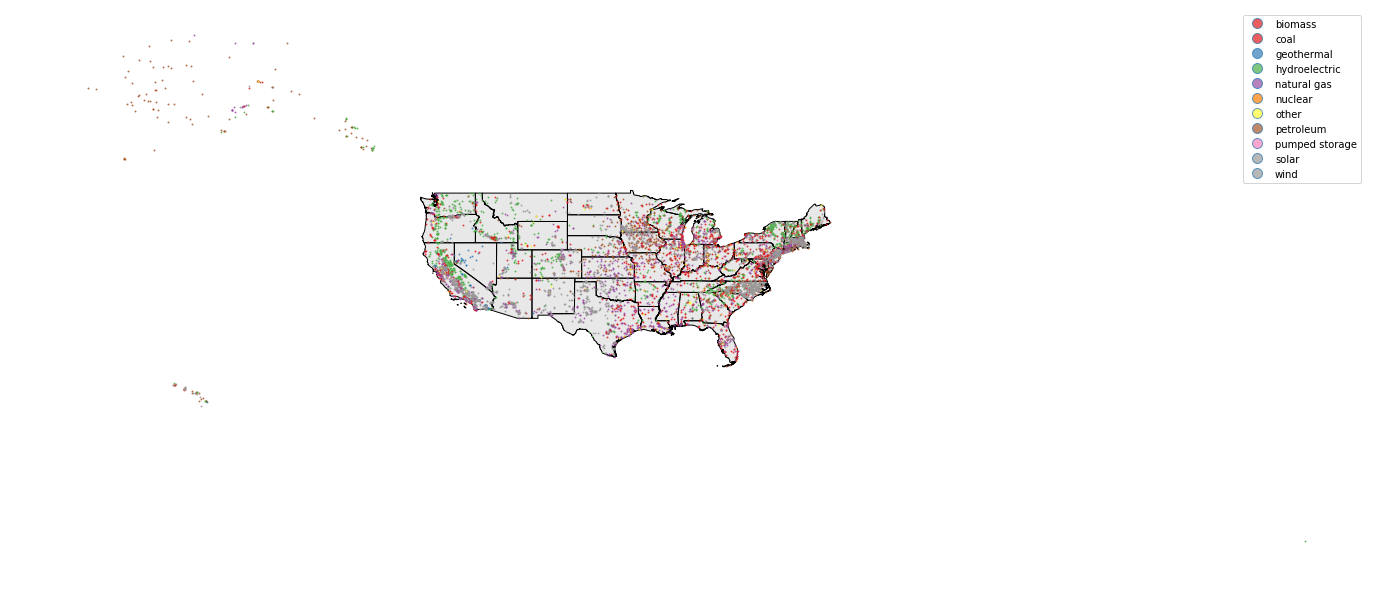

In [9]:
ax = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)].plot(figsize=(24,24), color='lightgray')
powerplants.plot(markersize=1, alpha=0.7, ax=ax, column='PrimSource', legend=True)
ax.axis('off')


# Make a map of air quality stations, color coded by average air quality



In [17]:
powerplants.dtypes

Plant_Code      int64
Plant_Name     object
Utility_Na     object
Utility_ID      int64
sector_nam     object
City           object
County         object
Zip             int64
Street_Add     object
PrimSource     object
Total_MW      float64
Coal_MW       float64
NG_MW         float64
Crude_MW      float64
Bio_MW        float64
Hydro_MW      float64
HydroPS_MW    float64
Nuclear_MW    float64
Solar_MW      float64
Wind_MW       float64
Geo_MW        float64
Other_MW      float64
source_des     object
tech_desc      object
Source         object
Period          int64
Latitude      float64
Longitude     float64
geometry       object
dtype: object

In [8]:
pm25 = pd.read_csv('pm25_annual_fixed.csv')
points = pm25.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
pm25 = gpd.GeoDataFrame(pm25, geometry=points)
pm25.crs = {'init': 'epsg:4326'}



In [19]:
pm25.head(1)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)


In [20]:
pm25.dtypes

State Code                         int64
County Code                        int64
Site Num                           int64
Parameter Code                     int64
POC                                int64
Latitude                         float64
Longitude                        float64
Datum                             object
Parameter Name                    object
Sample Duration                   object
Pollutant Standard                object
Metric Used                       object
Method Name                       object
Year                               int64
Units of Measure                  object
Event Type                        object
Observation Count                  int64
Observation Percent                int64
Completeness Indicator            object
Valid Day Count                    int64
Required Day Count                 int64
Exceptional Data Count             int64
Null Data Count                    int64
Primary Exceedance Count         float64
Secondary Exceed

(-163.98705724999999,
 -62.329077749999996,
 17.922097100000002,
 50.882560900000001)

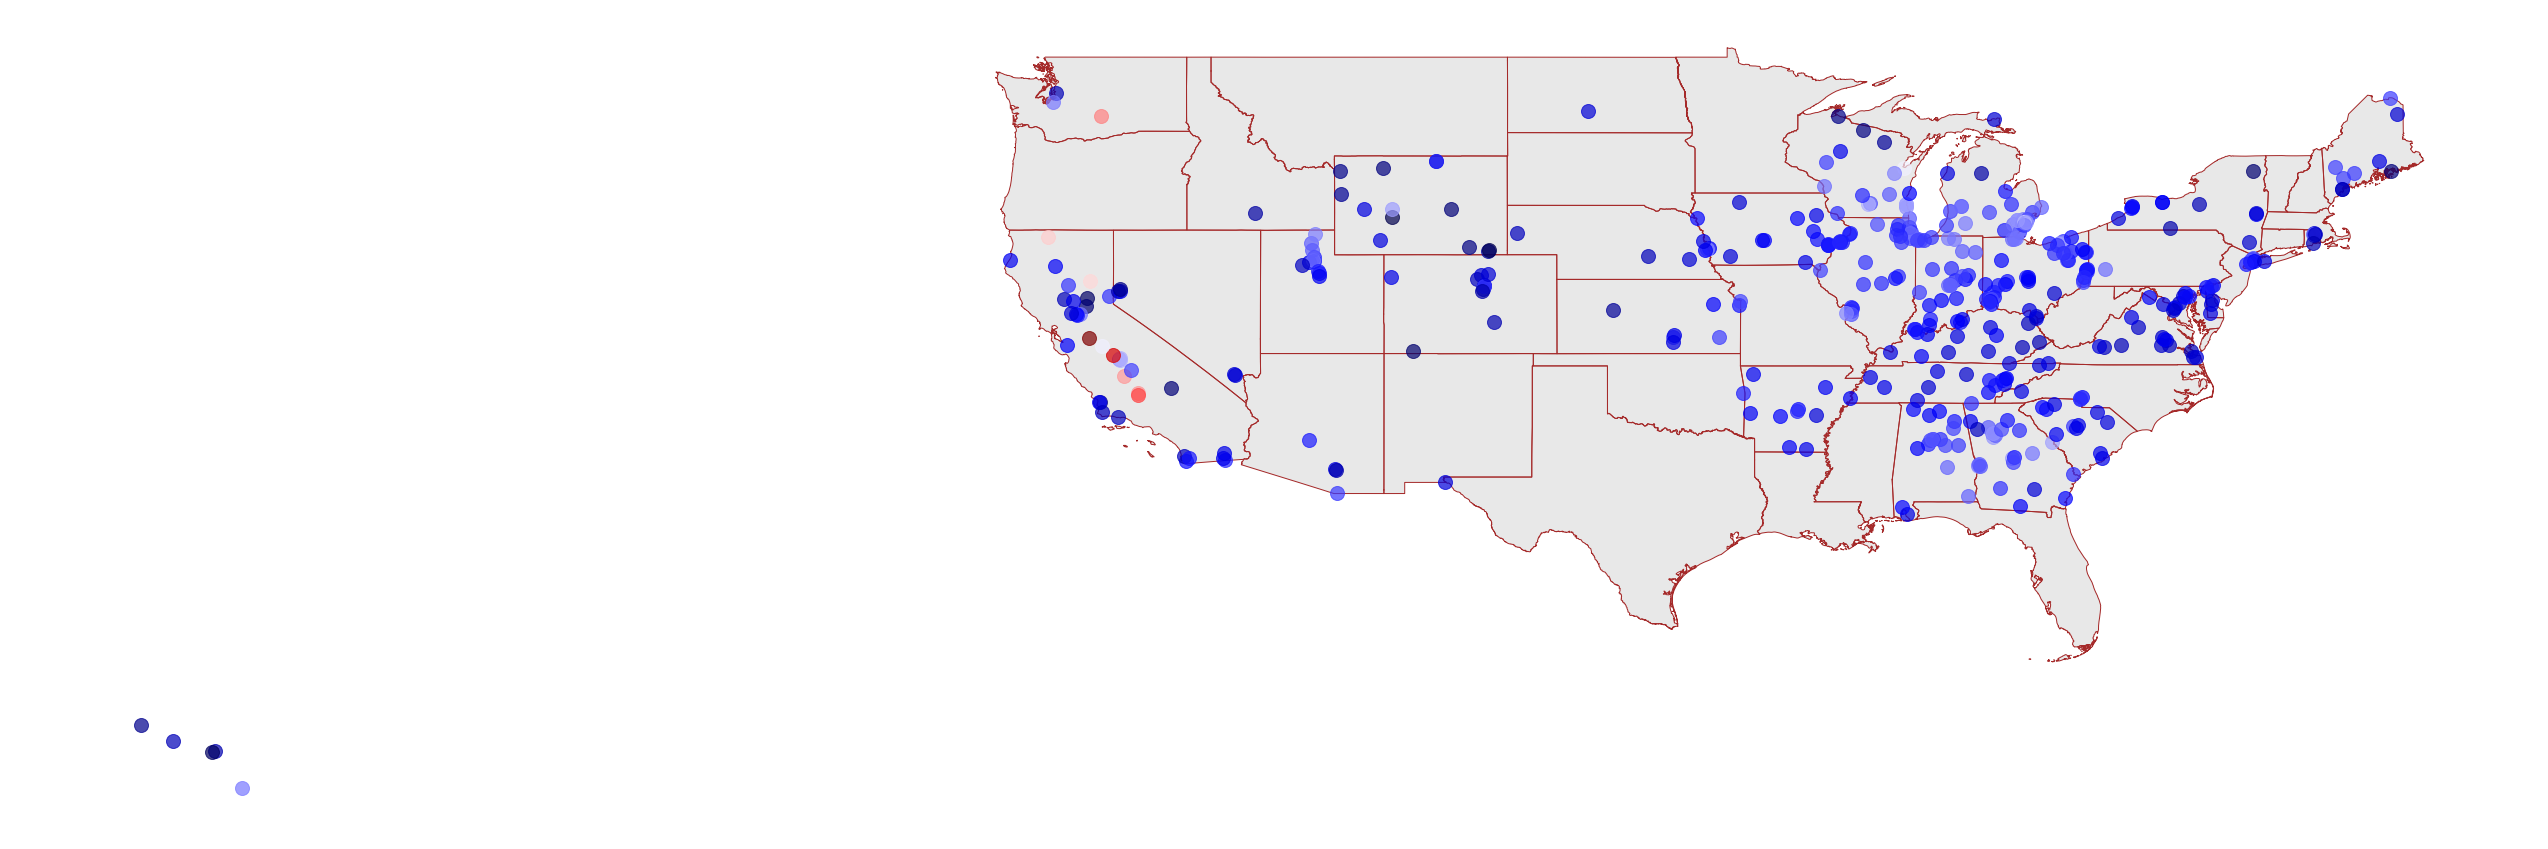

In [21]:
ax = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)].plot( figsize=(45,45), color='lightgray', edgecolor='brown' )
pm25.plot(markersize=14, alpha=0.7, ax=ax, column='Arithmetic Mean', cmap='seismic')
ax.axis('off')



# Make a map of air quality stations, color coded by worst air quality ever 
 

(-163.98705724999999,
 -62.329077749999996,
 17.922097100000002,
 50.882560900000001)

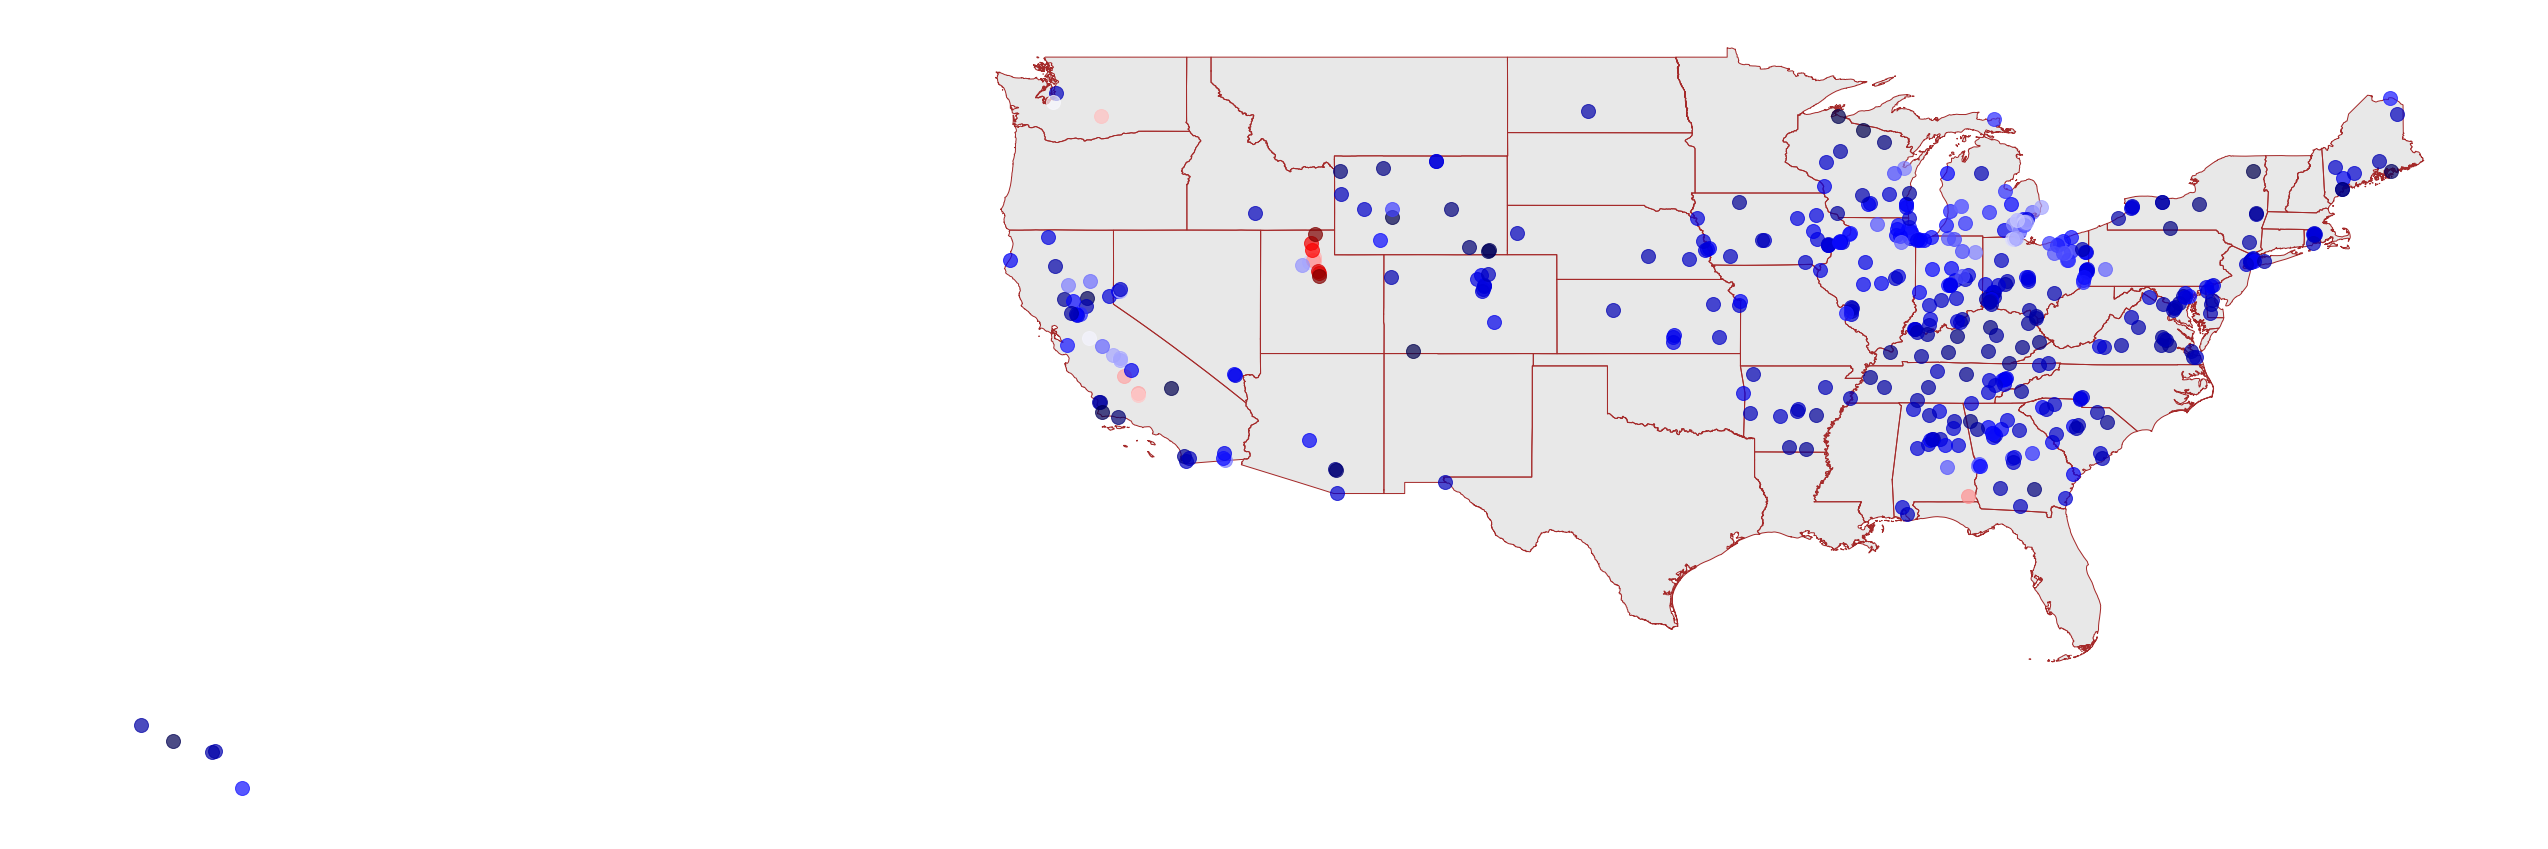

In [22]:
ax = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)].plot( figsize=(45,45), color='lightgray', edgecolor='brown' )
pm25.plot(markersize=14, alpha=0.7, ax=ax, column='1st Max Value', cmap='seismic')
ax.axis('off')




# Map the power plants owned by the top 5 most common energy companies as red. Map the rest of the plants as dark grey.

In [23]:
# ax = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)].plot(figsize=(24,24), color='lightgray')
# powerplants.plot(markersize=1, alpha=0.7, ax=ax, column='Utility_Na')
# ax.axis('off')






In [24]:
top_companies = powerplants.dissolve(by='Utility_Na', aggfunc='count')

In [25]:
top_companies.shape

(3695, 28)

In [26]:
# powerplants[['Utility_Na', 'geometry']].

In [27]:
powerplants.Utility_Na.value_counts().head()

Pacific Gas & Electric Co        82
Erie Boulevard Hydropower LP     71
Sustainable Power Group, LLC     63
Southern California Edison Co    62
PacifiCorp                       59
Name: Utility_Na, dtype: int64

In [28]:
powerplants_top5 = powerplants[powerplants.Utility_Na.isin(['Pacific Gas & Electric Co', 'Erie Boulevard Hydropower LP', 'Sustainable Power Group, LLC', 'Southern California Edison Co', 'PacifiCorp'])]

In [29]:
powerplants_bottom95 = powerplants[~powerplants.Utility_Na.isin(['Pacific Gas & Electric Co', 'Erie Boulevard Hydropower LP', 'Sustainable Power Group, LLC', 'Southern California Edison Co', 'PacifiCorp'])]

(-180.29806094999998, 8.5856219500000002, -3.5646000000000004, 74.8566)

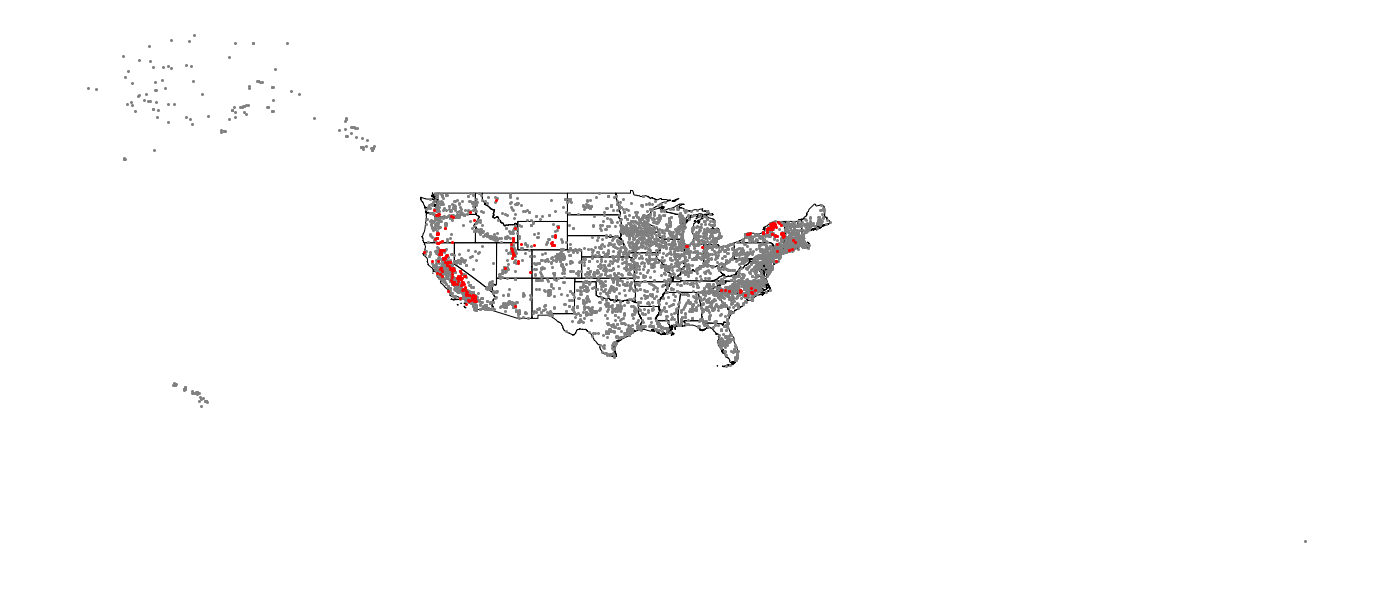

In [30]:
ax = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)].plot(figsize=(24,24), color='white')
powerplants_bottom95.plot(color='grey', ax=ax)
powerplants_top5.plot(color='red', ax=ax)
ax.axis('off')



# Map all of the nuclear power plants in red, with the rest of the plants as dark grey.



In [31]:
powerplants_nuclear = powerplants[powerplants.PrimSource.isin(['nuclear'])]

In [32]:
powerplants_not_nuclear = powerplants[~powerplants.PrimSource.isin(['nuclear'])]

(-180.29806094999998, 8.5856219500000002, -3.5646000000000004, 74.8566)

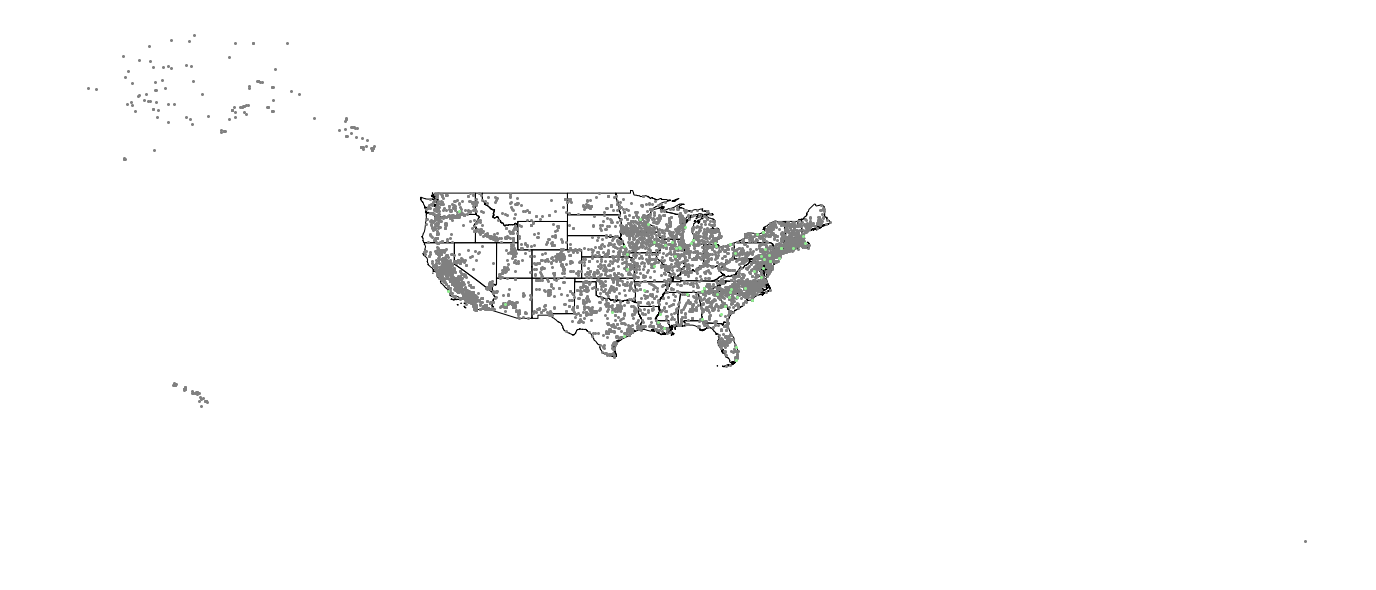

In [33]:
ax = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)].plot(figsize=(24,24), color='white')
powerplants_not_nuclear.plot(color='grey', ax=ax)
powerplants_nuclear.plot(color='lightgreen', ax=ax)
ax.axis('off')




# Map power plants that produce energy through both natural gas and oil.



In [34]:
oil_gas = powerplants[powerplants.source_des.isin(['petroleum'])]

In [35]:
oil_gas

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry


In [36]:
# powerplants_not_oil_gas = powerplants_search[powerplants_search.crude_gas.isin([0.0])]

In [37]:
# ax = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)].plot(figsize=(24,24), color='white')
# powerplants_not_oil_gas.plot(color='grey', ax=ax)
# powerplants_oil_gas.plot(color='red', ax=ax)
# ax.axis('off')





In [39]:
# powerplants_search.head(1)

In [40]:
second_powerplants_oil_gas = powerplants[(powerplants['NG_MW']> 0) & (powerplants["Crude_MW"]>0)]
second_powerplants_not_oil_gas = powerplants[(powerplants['NG_MW'] == 0)]


(-180.29806094999998,
 8.5856219500000002,
 -3.5321438500000002,
 74.175020849999996)

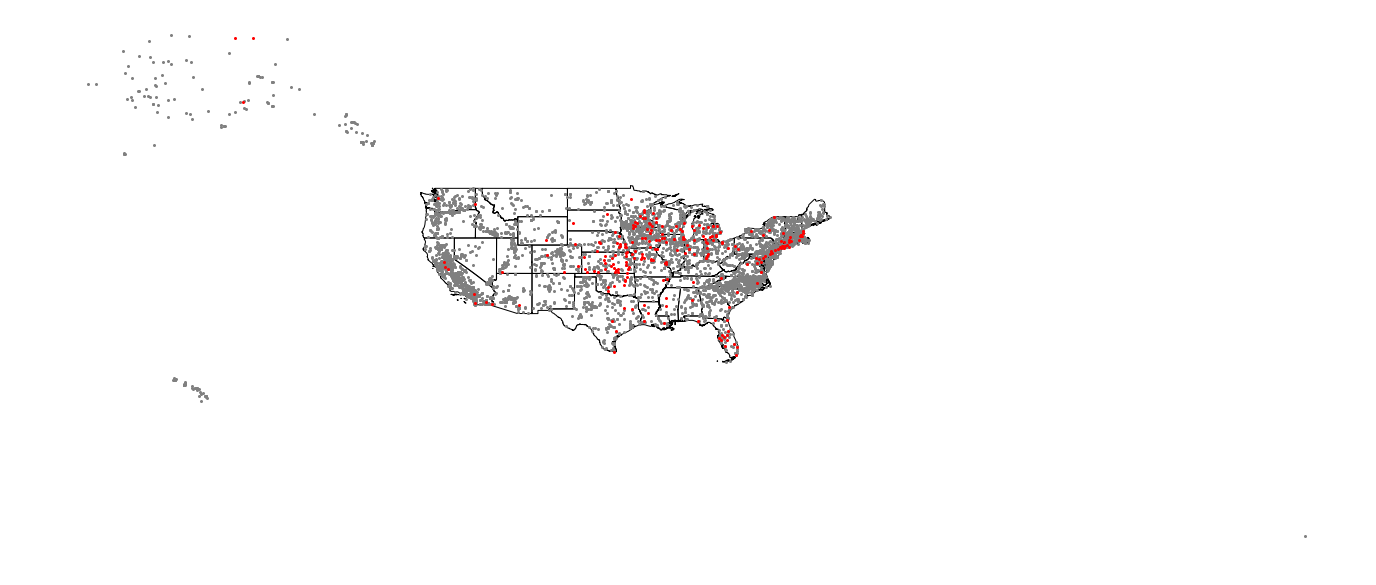

In [41]:
ax = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)].plot(figsize=(24,24), color='white')
second_powerplants_not_oil_gas.plot(color='grey', ax=ax)
second_powerplants_oil_gas.plot(color='red', ax=ax)
ax.axis('off')






# GROUP TWO: For most of these you'll need a spatial join



How many power plants are in each state?

Which power plants are in New York?

Which state has the most hydroelectric power plants?

Which state produces the most energy from coal?

Map states with nuclear power plants in red, and states without in grey. Do the same thing for solar.

Make a map of carbon dioxide emissions by state, with low emissions being light orange and high emissions being orange.

Make a map of total energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

Make a map of average air quality of each states, with high quality being light red and low quality being dark red

Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red

Map of average PM2.5 measurement by county

Make a map with color coded power plants, and a 100 mile circle about major American cities.

Which states have the most renewable plants, as a % of total plants? (include hydro, wind, solar)


* How many power plants are in each state?





In [42]:
states.head(1)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."


In [43]:
powerplants.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)


In [9]:
plants_in_states = gpd.sjoin(states.reset_index(), powerplants, how='inner', op='intersects')


In [10]:
states['plant_count'] = states.apply(lambda row: powerplants.within(row.geometry).sum(), axis=1)


In [11]:
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,plant_count
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",138
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",113
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",55
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1222


* Which power plants are in New York?

In [47]:
plants_in_states[plants_in_states.NAME=='New York']

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
43,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,...,0.0,0.0,NaN,NaN,Natural Gas = 316.9 MW,Natural Gas Fired Combined Cycle,"EIA-860, EIA-860M and EIA-923",201607,40.814200,-72.940300
43,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,...,31.5,0.0,NaN,NaN,Solar = 31.5 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201607,40.861111,-72.847777
43,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,...,0.0,0.0,NaN,NaN,Petroleum = 8.5 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,40.899997,-72.381977
43,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,...,0.0,0.0,NaN,NaN,Petroleum = 240.6 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,40.956932,-72.877411
43,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,...,0.0,0.0,NaN,NaN,Petroleum = 85 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,40.957053,-72.865877
43,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,...,0.0,0.0,NaN,NaN,Petroleum = 65.7 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,40.961590,-72.864976
43,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,...,0.0,0.0,NaN,NaN,Petroleum = 25.2 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,40.961706,-72.210277
43,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,...,0.0,0.0,NaN,NaN,Petroleum = 8.6 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.105500,-72.375800
43,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,...,0.0,0.0,NaN,NaN,Petroleum = 10 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.105900,-72.376100
43,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,...,0.0,0.0,NaN,NaN,Petroleum = 52.7 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.106030,-72.376155


* Which state has the most hydroelectric power plants?



In [48]:
plants_in_states.head(1)

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Hydroelectric = 186 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.680394,-85.911442


In [49]:
hydroplants = plants_in_states[['NAME', 'Hydro_MW', 'HydroPS_MW']]

In [50]:
hydroplants.groupby('HydroPS_MW')['NAME'].value_counts().head()

HydroPS_MW  NAME          
0.0         California        1213
            North Carolina     460
            Texas              396
            New York           370
            Minnesota          274
Name: NAME, dtype: int64

In [51]:
hydroplants.groupby('Hydro_MW')['NAME'].value_counts().head()

Hydro_MW  NAME          
0.0       California        973
          North Carolina    419
          Texas             374
          Minnesota         247
          Massachusetts     225
Name: NAME, dtype: int64

In [52]:
hydroplants.groupby(['HydroPS_MW', 'Hydro_MW'])['NAME'].value_counts().head()

HydroPS_MW  Hydro_MW  NAME          
0.0         0.0       California        968
                      North Carolina    419
                      Texas             374
                      Minnesota         247
                      Massachusetts     223
Name: NAME, dtype: int64

* Which state produces the most energy from coal?



In [53]:
coal_power = plants_in_states[['Coal_MW', 'NAME']]

In [54]:
coal_power.groupby('NAME')['Coal_MW'].sum().sort_values(ascending=False)

NAME
Texas                   23588.5
Indiana                 16111.4
Ohio                    15189.9
Illinois                14644.6
Pennsylvania            13313.4
Kentucky                13092.7
West Virginia           12999.0
Missouri                11932.0
North Carolina          10802.8
Florida                 10234.0
Georgia                  9508.5
Michigan                 9451.0
Alabama                  7979.4
Wisconsin                7371.4
Tennessee                7077.3
Wyoming                  6410.1
Arizona                  5910.0
Iowa                     5681.7
South Carolina           5547.0
Arkansas                 5122.4
Colorado                 5089.8
Oklahoma                 4866.5
Utah                     4754.0
Maryland                 4712.0
Kansas                   4687.2
Minnesota                4300.1
Virginia                 4264.3
North Dakota             4214.4
Nebraska                 3929.0
New Mexico               3471.0
Louisiana                2855.1
Mon

* Map states with nuclear power plants in red, and states without in grey. Do the same thing for solar.



In [55]:
plants_with_states = gpd.sjoin(powerplants, states, how='left', op='within')


In [56]:


states_for_counting = states.set_index('NAME')
states_for_counting.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,plant_count
NAME,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",138
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",113
Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",55
California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1222


In [57]:
states_for_counting['plant_count'] = plants_with_states['NAME'].value_counts()


In [58]:
states_for_counting['plant_count'].fillna(0, inplace=False)


NAME
Alabama                                           72.0
Alaska                                           138.0
Arizona                                          113.0
Arkansas                                          55.0
California                                      1222.0
Colorado                                         153.0
Connecticut                                       88.0
Delaware                                          25.0
District of Columbia                               2.0
Georgia                                          139.0
Hawaii                                            50.0
Idaho                                            136.0
Illinois                                         200.0
Indiana                                          133.0
Iowa                                             222.0
Kansas                                           129.0
Maryland                                          76.0
Minnesota                                        274.0
Missi

In [59]:
states_for_counting.reset_index()


,NAME,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,plant_count
0,Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72.0
1,Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",138.0
2,Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",113.0
3,Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",55.0
4,California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1222.0
5,Colorado,0400000US08,268429343790,1175112870,08,00,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",153.0
6,Connecticut,0400000US09,12542638347,1815476291,09,00,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41...",88.0
7,Delaware,0400000US10,5047194742,1398720828,10,00,10,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999...",25.0
8,District of Columbia,0400000US11,158364992,18633403,11,00,11,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000...",2.0
9,Georgia,0400000US13,149169848456,4741100880,13,00,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27...",139.0


In [60]:
states_for_counting


,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,plant_count
NAME,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72.0
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",138.0
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",113.0
Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",55.0
California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1222.0
Colorado,0400000US08,268429343790,1175112870,08,00,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",153.0
Connecticut,0400000US09,12542638347,1815476291,09,00,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41...",88.0
Delaware,0400000US10,5047194742,1398720828,10,00,10,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999...",25.0
District of Columbia,0400000US11,158364992,18633403,11,00,11,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000...",2.0


In [61]:
plants_with_states

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,plant_count
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,72.0
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,72.0
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,72.0
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,72.0
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,72.0
5,9,Copper,El Paso Electric Co,5701,Electric Utility,El Paso,El Paso,79915,651 Hawkins Blvd.,natural gas,...,0400000US48,6.766335e+11,1.902599e+10,48,00,Texas,48,01779801,TX,396.0
6,10,Greene County,Alabama Power Co,195,Electric Utility,Demopolis,Greene,36732,Highway 43,natural gas,...,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,72.0
7,11,H Neely Henry Dam,Alabama Power Co,195,Electric Utility,Ohatchee,Calhoun,36271,1021 Ala Highway 144,hydroelectric,...,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,72.0
8,12,Holt Dam,Alabama Power Co,195,Electric Utility,Tuscaloosa,Tuscaloosa,35476,12117 Power Plant Road,hydroelectric,...,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,72.0
9,13,Jordan Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,6150Jordan Dam Lane,hydroelectric,...,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,72.0


In [62]:
states_for_counting.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,plant_count
NAME,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72.0
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",138.0
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",113.0
Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",55.0
California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1222.0


In [63]:
states_nuclear = plants_in_states[plants_in_states.PrimSource.isin(['nuclear'])]
states_nuclear_not = plants_in_states[~plants_in_states.PrimSource.isin(['nuclear'])]



In [64]:
states_nuclear_not.crs

{'init': 'epsg:4269'}

In [65]:
type(states_nuclear)

geopandas.geodataframe.GeoDataFrame

In [66]:
# ax = states_nuclear.plot( color='red')
# states_nuclear_not.plot(ax=ax, color='grey')
# ax.axis('off')



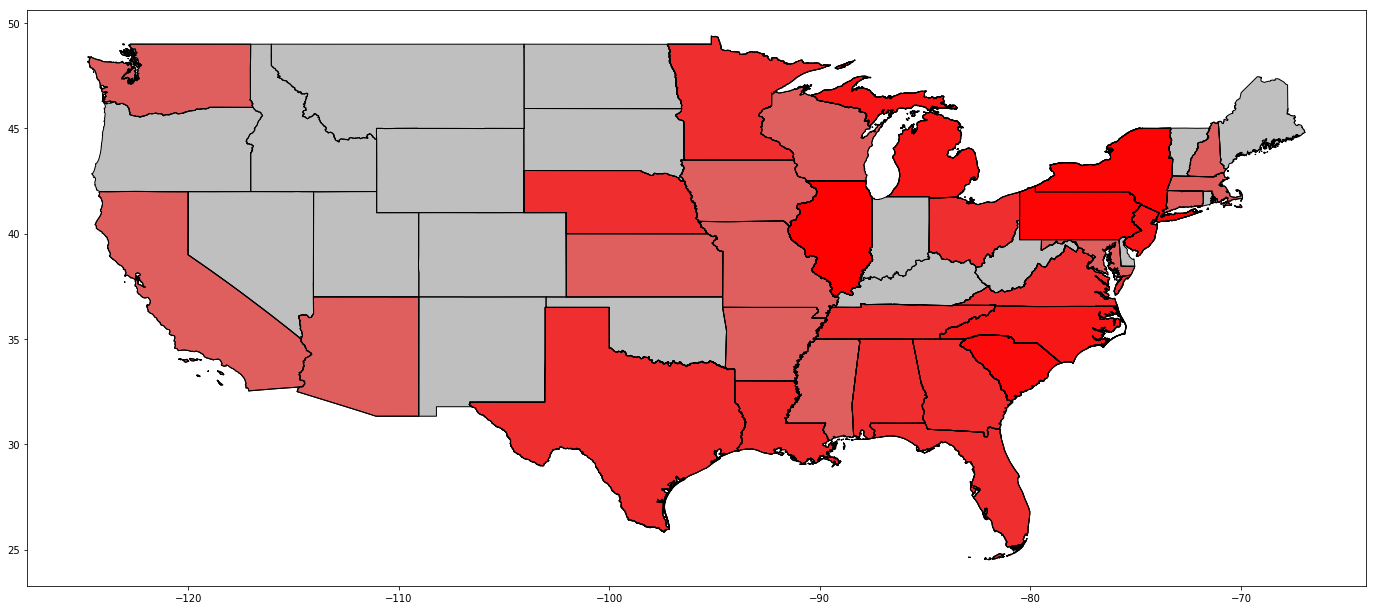

In [67]:
ax = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)].plot(figsize=(24,24), color='grey')
states_nuclear.plot(color='red', ax=ax)





In [68]:
states_solar = plants_in_states[plants_in_states.PrimSource.isin(['solar'])]


In [69]:
states_solar_not = plants_in_states[~plants_in_states.PrimSource.isin(['solar'])]
states_solar = plants_in_states[plants_in_states.PrimSource.isin(['solar'])]





In [70]:
states_solar.head(1)

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
2,2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,...,1.2,0.0,NaN,NaN,Solar = 1.2 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201607,32.096973,-110.8106


In [71]:
# states_solar.drop_duplicates(subset='NAME', inplace=True)


KeyboardInterrupt: 

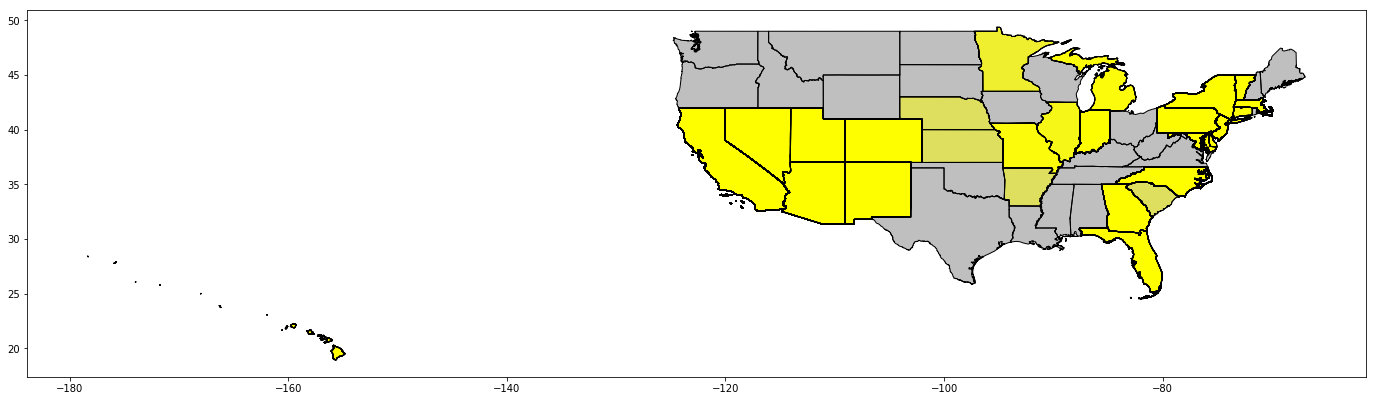

In [72]:
ax = states[states.to_crs({'init': 'epsg:4269'}).within(continental_poly)].plot(figsize=(24,24), color='grey')
states_solar.plot(color='yellow', ax=ax)
ax.axis('off')

#it just gets stuck.



* Make a map of carbon dioxide emissions by state, with low emissions being light orange and high emissions being orange.



In [107]:
carbon = pd.read_csv('Total Carbon Dioxide Emissions-StateRankings.csv')

In [109]:
carbonated_states = states.merge(carbon, left_on='STUSPS', right_on='State', how='inner')

{'init': 'epsg:4269'}

In [ ]:
ax = carbonated_states.to_crs({'init':'epsg:2163'}).plot(figsize=(15,15), column= 'Total Carbon Dioxide Emissions, million metric tons', cmap='Oranges', edgecolor='pink')
ax
ax.axis('off')



* Make a map of total energy produced by each state, with little being a light color and high emissions being a brighter/darker color.



In [ ]:
# plants_with_states.dtypes

In [ ]:
plants_with_states.crs

In [ ]:
plants_with_states.dtypes

In [ ]:
states_for_counting['Total_energy'] = plants_with_states.groupby('NAME')['Total_MW'].sum()

In [ ]:
states_for_counting

In [ ]:
ax = states_for_counting.to_crs({'init':'epsg:2163'}).plot(figsize=(15,15), column= 'Total_energy', cmap='Wistia', edgecolor='pink')
ax
ax.axis('off')




* Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.



In [ ]:
states_for_counting['Total_wind'] = plants_with_states.groupby('NAME')['Wind_MW'].sum()

In [ ]:
ax = states_for_counting.to_crs({'init':'epsg:2163'}).plot(figsize=(15,15), column= 'Total_wind', cmap='cool', edgecolor='pink')
ax
ax.axis('off')


* Make a map of average air quality of each states, with high quality being light red and low quality being dark red



In [111]:
pm25.head(1)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)


In [116]:
states_for_counting.head(1)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,plant_count,avg_air_qual
NAME,,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72.0,154.812686


In [112]:
states_for_counting['avg_air_qual'] = pm25.groupby('State Name')['Arithmetic Mean'].sum()

(-5084027.021374774, 5078419.621888997)

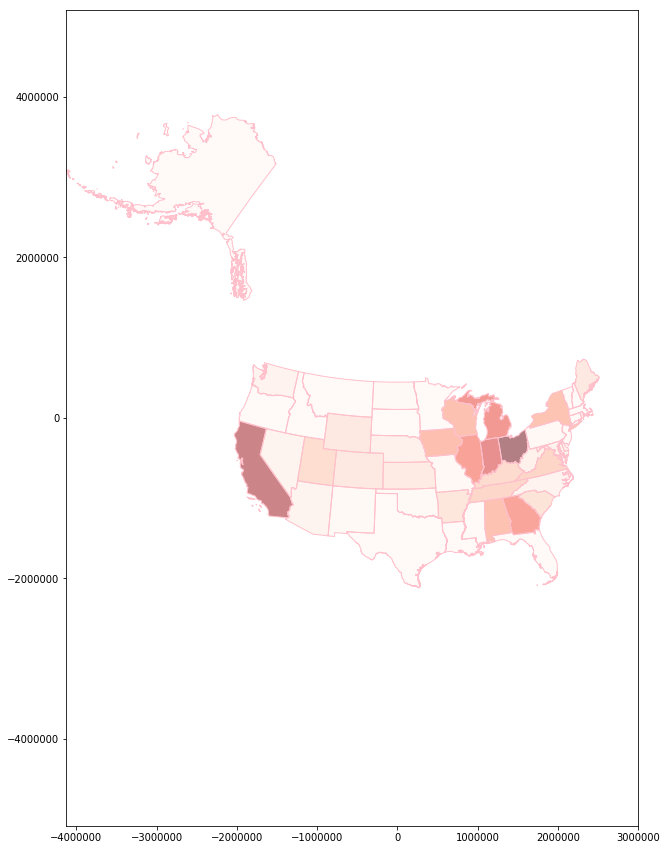

In [114]:
ax = states_for_counting.to_crs({'init':'epsg:2163'}).plot(figsize=(15,15), column= 'avg_air_qual', cmap='Reds', edgecolor='pink')
ax
ax.set_xlim(-4124457, 3000000)
ax.set_ylim(-5084027.0213747746, 5078419.621888997)





* Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red



In [ ]:
states_for_counting['worst_air_qual'] = pm25.groupby('State Name')['1st Max Value'].mean()

In [ ]:
ax = states_for_counting.to_crs({'init':'epsg:2163'}).plot(figsize=(15,15), column= 'worst_air_qual', cmap='Reds', edgecolor='pink')
ax
ax.set_xlim(-4124457, 3000000)
ax.set_ylim(-2584027.0213747746, 4078419.621888997)







* Map of average PM2.5 measurement by county



In [74]:
counties = gpd.read_file('cb_2016_us_county_500k/')

In [75]:
counties.shape

(3233, 10)

In [76]:
type(counties)

geopandas.geodataframe.GeoDataFrame

In [84]:
# plants_with_states = gpd.sjoin(powerplants, states, how='left', op='within')


# states_for_counting = states.set_index('NAME')
# states_for_counting.head()
# states_for_counting['plant_count'] = plants_with_states['NAME'].value_counts()



In [82]:
plants_in_counties = gpd.sjoin(powerplants, counties, how='left', op='within')

In [83]:
counties_for_counting = counties.set_index('NAME')
counties_for_counting['plant_count'] = plants_in_counties['NAME'].value_counts()




In [85]:
counties_for_counting.head()



,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,STATEFP,geometry,plant_count
NAME,,,,,,,,,,
Keokuk,0500000US19107,1500067253,1929323,107,00465242,19107,06,19,"POLYGON ((-92.41199499999999 41.509548, -92.35...",NaN
Winnebago,0500000US19189,1037261946,3182052,189,00465283,19189,06,19,"POLYGON ((-93.97076 43.499605, -93.88843009910...",15.0
Kearny,0500000US20093,2254696689,1133601,093,00485011,20093,06,20,"POLYGON ((-101.54192 37.914575, -101.541863 37...",1.0
Mitchell,0500000US20123,1817632928,44979981,123,00485026,20123,06,20,"POLYGON ((-98.49006799999999 39.241666, -98.49...",10.0
Stanton,0500000US20187,1762104518,178555,187,00485055,20187,06,20,"POLYGON ((-102.041899 37.541186, -102.041894 3...",1.0


In [86]:
counties_for_counting['avg_pm25']  = pm25.groupby('County Name')['Arithmetic Mean'].mean()

In [87]:
counties_for_counting.dropna()


,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,STATEFP,geometry,plant_count,avg_pm25
NAME,,,,,,,,,,,
Winnebago,0500000US19189,1037261946,3182052,189,00465283,19189,06,19,"POLYGON ((-93.97076 43.499605, -93.88843009910...",15.0,9.307143
Clark,0500000US21049,653878894,6972358,049,00516871,21049,06,21,"POLYGON ((-84.34698 37.899721, -84.345669 37.9...",50.0,7.081793
Daviess,0500000US21059,1187163562,47158144,059,00516876,21059,06,21,"POLYGON ((-87.405293 37.689613, -87.4011809999...",2.0,7.109091
Hardin,0500000US21093,1614335113,17702152,093,00516893,21093,06,21,"POLYGON ((-86.277558 37.588806, -86.274202 37....",5.0,6.536364
Madison,0500000US21151,1132603931,15426522,151,00516919,21151,06,21,"POLYGON ((-84.525643 37.769497, -84.5234979999...",20.0,8.116011
Marion,0500000US21155,888390643,9967834,155,00516921,21155,06,21,"POLYGON ((-85.52128999999999 37.554343, -85.50...",39.0,9.565058
Morgan,0500000US21175,987115107,6889992,175,00516934,21175,06,21,"POLYGON ((-83.506513 37.869737, -83.504558 37....",9.0,7.396429
Baldwin,0500000US01003,4117584019,1133130502,003,00161527,01003,06,01,"POLYGON ((-88.02857999999999 30.226763, -88.02...",1.0,6.535714
Clarke,0500000US01025,3207609336,36542657,025,00161538,01025,06,01,"POLYGON ((-88.18049499999999 31.820128, -88.17...",4.0,8.530000


In [88]:
import numpy as np

In [89]:
np.nan

nan

In [90]:
counties_for_counting.replace('NaN', np.nan)

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,STATEFP,geometry,plant_count,avg_pm25
NAME,,,,,,,,,,,
Keokuk,0500000US19107,1500067253,1929323,107,00465242,19107,06,19,"POLYGON ((-92.41199499999999 41.509548, -92.35...",NaN,NaN
Winnebago,0500000US19189,1037261946,3182052,189,00465283,19189,06,19,"POLYGON ((-93.97076 43.499605, -93.88843009910...",15.0,9.307143
Kearny,0500000US20093,2254696689,1133601,093,00485011,20093,06,20,"POLYGON ((-101.54192 37.914575, -101.541863 37...",1.0,NaN
Mitchell,0500000US20123,1817632928,44979981,123,00485026,20123,06,20,"POLYGON ((-98.49006799999999 39.241666, -98.49...",10.0,NaN
Stanton,0500000US20187,1762104518,178555,187,00485055,20187,06,20,"POLYGON ((-102.041899 37.541186, -102.041894 3...",1.0,NaN
Anderson,0500000US21005,522745702,6311537,005,00516849,21005,06,21,"POLYGON ((-85.169186 37.997916, -85.168345 37....",12.0,NaN
Bullitt,0500000US21029,769289863,8391940,029,00516861,21029,06,21,"POLYGON ((-85.936065 37.998816, -85.9346429999...",NaN,NaN
Clark,0500000US21049,653878894,6972358,049,00516871,21049,06,21,"POLYGON ((-84.34698 37.899721, -84.345669 37.9...",50.0,7.081793
Daviess,0500000US21059,1187163562,47158144,059,00516876,21059,06,21,"POLYGON ((-87.405293 37.689613, -87.4011809999...",2.0,7.109091


In [91]:
counties_for_counting.replace(np.nan, 0 )

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,STATEFP,geometry,plant_count,avg_pm25
NAME,,,,,,,,,,,
Keokuk,0500000US19107,1500067253,1929323,107,00465242,19107,06,19,"POLYGON ((-92.41199499999999 41.509548, -92.35...",0.0,0.000000
Winnebago,0500000US19189,1037261946,3182052,189,00465283,19189,06,19,"POLYGON ((-93.97076 43.499605, -93.88843009910...",15.0,9.307143
Kearny,0500000US20093,2254696689,1133601,093,00485011,20093,06,20,"POLYGON ((-101.54192 37.914575, -101.541863 37...",1.0,0.000000
Mitchell,0500000US20123,1817632928,44979981,123,00485026,20123,06,20,"POLYGON ((-98.49006799999999 39.241666, -98.49...",10.0,0.000000
Stanton,0500000US20187,1762104518,178555,187,00485055,20187,06,20,"POLYGON ((-102.041899 37.541186, -102.041894 3...",1.0,0.000000
Anderson,0500000US21005,522745702,6311537,005,00516849,21005,06,21,"POLYGON ((-85.169186 37.997916, -85.168345 37....",12.0,0.000000
Bullitt,0500000US21029,769289863,8391940,029,00516861,21029,06,21,"POLYGON ((-85.936065 37.998816, -85.9346429999...",0.0,0.000000
Clark,0500000US21049,653878894,6972358,049,00516871,21049,06,21,"POLYGON ((-84.34698 37.899721, -84.345669 37.9...",50.0,7.081793
Daviess,0500000US21059,1187163562,47158144,059,00516876,21059,06,21,"POLYGON ((-87.405293 37.689613, -87.4011809999...",2.0,7.109091


In [95]:
counties_for_counting.avg_pm25m25.max()

25.050000000000001

(-2584027.0213747746, 4078419.621888997)

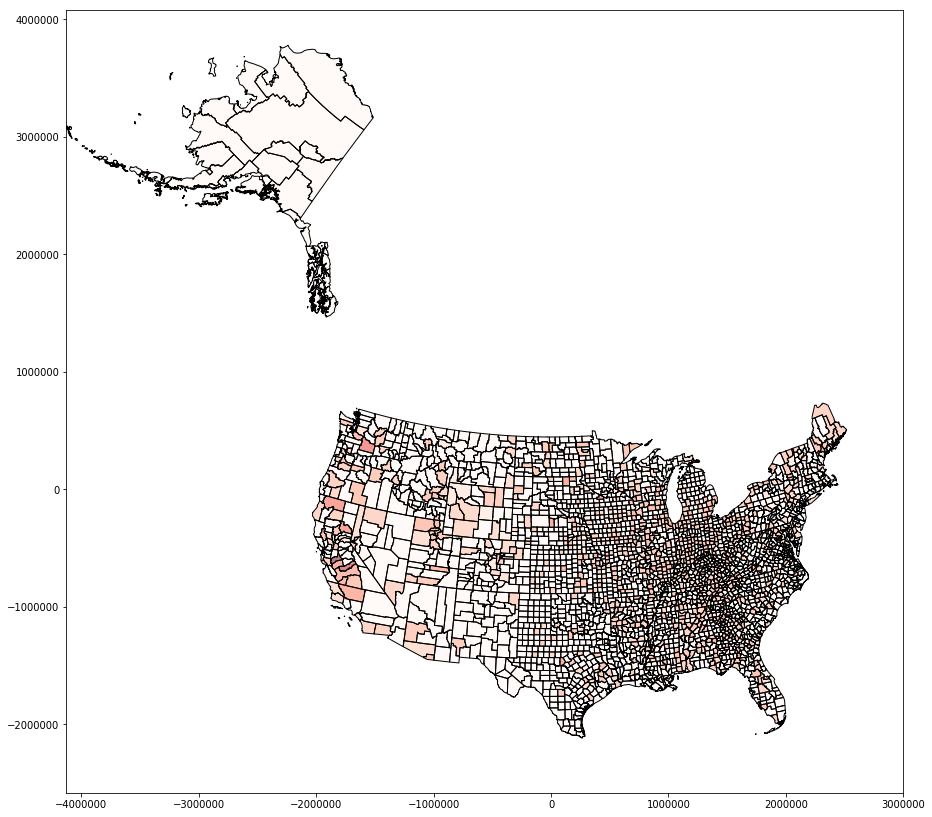

In [96]:
ax = counties_for_counting.to_crs({'init':'epsg:2163'}).plot(figsize=(15,15), column= 'avg_pm25', cmap='Reds', edgecolor='grey', vmin=0.0, vmax=25.050000000000001)
ax.set_xlim(-4124457, 3000000)
ax.set_ylim(-2584027.0213747746, 4078419.621888997)





#FUuUUUUU


* Make a map with color coded power plants, and a 100 mile circle about major American cities.



In [97]:
powerplants = powerplants.to_crs({'proj': 'merc'})

In [98]:
buff_plants = powerplants.buffer(1000)

In [99]:
buff_plants.crs

{'proj': 'merc'}

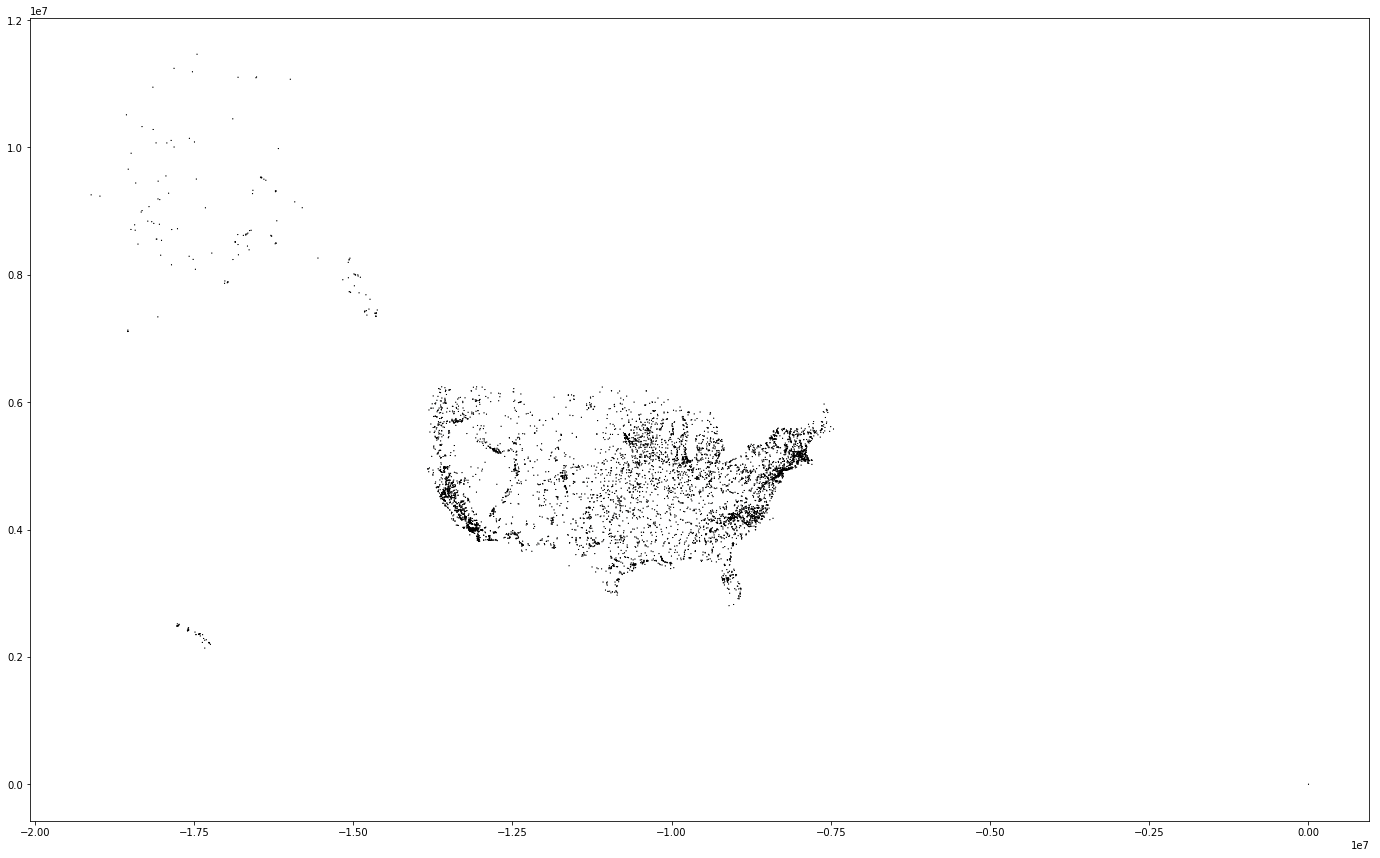

In [100]:
powerplants.to_crs({'proj': 'merc'}).buffer(800).plot(figsize=(24,24))

In [103]:
buff_plants = buff_plants.to_crs({'proj': 'merc'})

In [101]:
counties.crs

{'init': 'epsg:4269'}

In [ ]:
counties = counties.to_crs({'proj': 'merc'})


KeyError: <matplotlib.axes._subplots.AxesSubplot object at 0x1100f75f8>

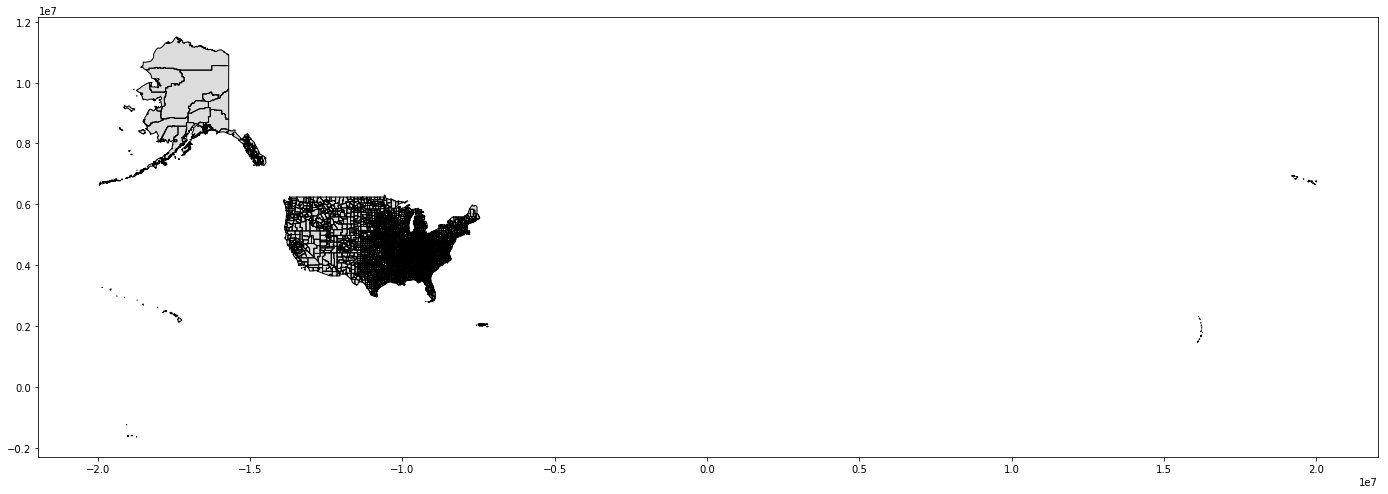

In [105]:
ax = counties[counties.to_crs({'proj': 'merc'}).plot(figsize=(24,24), color='#BBBBBB')]
buff_plants.plot(ax=ax, linewidth=0)
ax.axis('off')




In [ ]:
buff_plants.crs

In [ ]:
powerplants.crs

Which states have the most renewable plants, as a % of total plants? (include hydro, wind, solar)



In [ ]:
# hydroelectric geothermal  

In [13]:
plants_in_states.PrimSource.value_counts()

natural gas       1675
hydroelectric     1394
solar             1379
wind               932
petroleum          831
biomass            737
coal               380
other              110
geothermal          66
nuclear             62
pumped storage      34
Name: PrimSource, dtype: int64

In [ ]:
renewable = plants_in_states[['NAME', 'Hydro_MW', 'HydroPS_MW']]